In [1]:
# load hdf5 file and plot the data
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from imblearn.under_sampling import TomekLinks, ClusterCentroids

In [2]:
vdisc_train_raw = h5py.File('Datasets/VDISC_train.hdf5')
vdisc_test_raw = h5py.File('Datasets/VDISC_test.hdf5')
vdisc_valid_raw = h5py.File('Datasets/VDISC_validate.hdf5')

In [3]:
# Convert hdf5 to pandas dataframe
def hdf5_to_df(hdf5_file):
    data_frame = {
        'code': hdf5_file['functionSource'],
        'CWE-119': hdf5_file['CWE-119'],
        'CWE-120': hdf5_file['CWE-120'],
        'CWE-469': hdf5_file['CWE-469'],
        'CWE-476': hdf5_file['CWE-476'],
        'CWE-OTHERS': hdf5_file['CWE-other'],
    }
    return pd.DataFrame(data=data_frame)

In [4]:
vdisc_train = hdf5_to_df(vdisc_train_raw)
vdisc_test = hdf5_to_df(vdisc_test_raw)
vdisc_valid = hdf5_to_df(vdisc_valid_raw)

In [5]:
vdisc_train.head()

,code,CWE-119,CWE-120,CWE-469,CWE-476,CWE-OTHERS
0,"b'clear_area(int startx, int starty, int xsize...",False,False,False,False,False
1,b'ReconstructDuList(Statement* head)\n{\n S...,False,False,False,False,False
2,b'free_speaker(void)\n{\n if(Lengths)\n ...,False,False,False,False,False
3,b'mlx4_register_device(struct mlx4_dev *dev)\n...,False,False,False,False,False
4,"b'Parse_Env_Var(void)\n{\n char *p = getenv(""...",True,True,False,False,True


In [6]:
vdisc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019471 entries, 0 to 1019470
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   code        1019471 non-null  object
 1   CWE-119     1019471 non-null  bool  
 2   CWE-120     1019471 non-null  bool  
 3   CWE-469     1019471 non-null  bool  
 4   CWE-476     1019471 non-null  bool  
 5   CWE-OTHERS  1019471 non-null  bool  
dtypes: bool(5), object(1)
memory usage: 12.6+ MB


In [7]:
# Combine the three datasets
vdisc = pd.concat([vdisc_train, vdisc_test, vdisc_valid], ignore_index=True)
vdisc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   code        1274366 non-null  object
 1   CWE-119     1274366 non-null  bool  
 2   CWE-120     1274366 non-null  bool  
 3   CWE-469     1274366 non-null  bool  
 4   CWE-476     1274366 non-null  bool  
 5   CWE-OTHERS  1274366 non-null  bool  
dtypes: bool(5), object(1)
memory usage: 15.8+ MB


### Separate the data into each CWE

In [8]:
# CWE-119
drop_cols = ['CWE-120', 'CWE-469', 'CWE-476', 'CWE-OTHERS']
cwe_119_df = vdisc.drop(columns=drop_cols, axis=1)
cwe_119_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   code     1274366 non-null  object
 1   CWE-119  1274366 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 10.9+ MB


In [9]:
# CWE-120
drop_cols = ['CWE-119', 'CWE-469', 'CWE-476', 'CWE-OTHERS']
cwe_120_df = vdisc.drop(columns=drop_cols, axis=1)
cwe_120_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   code     1274366 non-null  object
 1   CWE-120  1274366 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 10.9+ MB


In [10]:
# CWE-469
drop_cols = ['CWE-119', 'CWE-120', 'CWE-476', 'CWE-OTHERS']
cwe_469_df = vdisc.drop(columns=drop_cols, axis=1)
cwe_469_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   code     1274366 non-null  object
 1   CWE-469  1274366 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 10.9+ MB


In [11]:
# CWE-476
drop_cols = ['CWE-119', 'CWE-120', 'CWE-469', 'CWE-OTHERS']
cwe_476_df = vdisc.drop(columns=drop_cols, axis=1)
cwe_476_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   code     1274366 non-null  object
 1   CWE-476  1274366 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 10.9+ MB


In [12]:
# CWE-OTHERS
drop_cols = ['CWE-119', 'CWE-120', 'CWE-469', 'CWE-476']
cwe_others_df = vdisc.drop(columns=drop_cols, axis=1)
cwe_others_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   code        1274366 non-null  object
 1   CWE-OTHERS  1274366 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 10.9+ MB


### Checking True Positive and False Positive for each CWE

CWE-119
False    1250209
True       24157
Name: count, dtype: int64


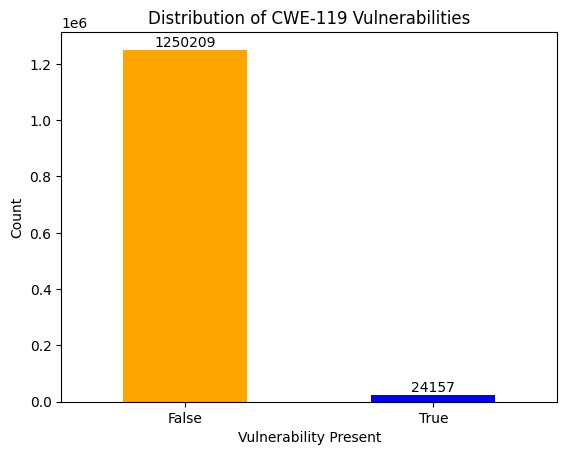

In [13]:
# Plot the distribution of CWE-119 vulnerabilities
counts = cwe_119_df['CWE-119'].value_counts()
ax = counts.plot(kind='bar', color=['orange', 'blue'])
plt.xticks(rotation=0)
plt.title('Distribution of CWE-119 Vulnerabilities')
plt.xlabel('Vulnerability Present')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
print(counts)
plt.show()

CWE-120
False    1226706
True       47660
Name: count, dtype: int64


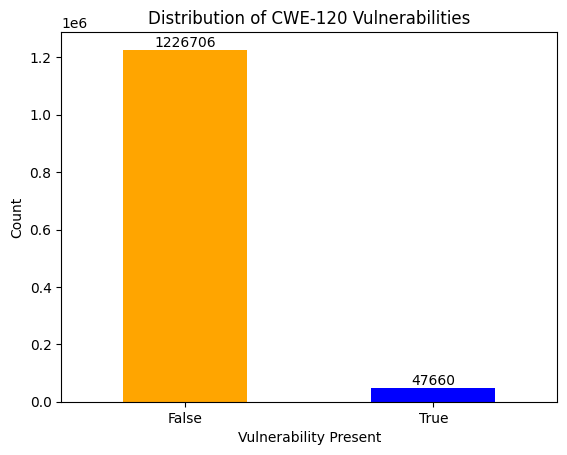

In [14]:
# Plot the distribution of CWE-120 vulnerabilities
counts = cwe_120_df['CWE-120'].value_counts()
ax = counts.plot(kind='bar', color=['orange', 'blue'])
plt.xticks(rotation=0)
plt.title('Distribution of CWE-120 Vulnerabilities')
plt.xlabel('Vulnerability Present')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
print(counts)
plt.show()

CWE-469
False    1271741
True        2625
Name: count, dtype: int64


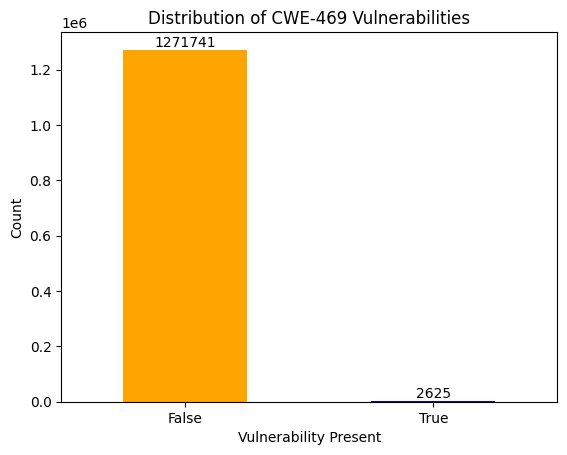

In [15]:
# Plot the distribution of CWE-469 vulnerabilities
counts = cwe_469_df['CWE-469'].value_counts()
ax = counts.plot(kind='bar', color=['orange', 'blue'])
plt.xticks(rotation=0)
plt.title('Distribution of CWE-469 Vulnerabilities')
plt.xlabel('Vulnerability Present')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
print(counts)
plt.show()

CWE-476
False    1262272
True       12094
Name: count, dtype: int64


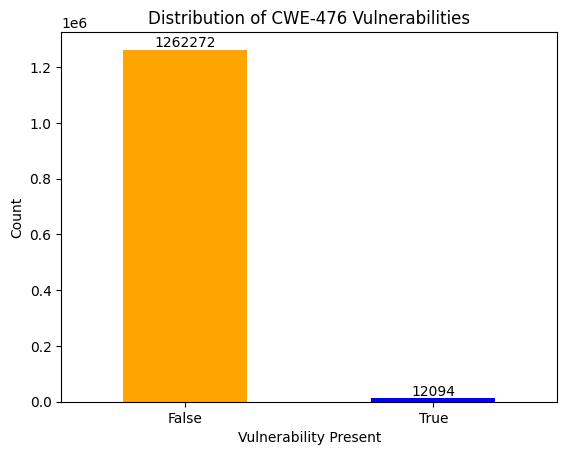

In [16]:
# Plot the distribution of CWE-476 vulnerabilities
counts = cwe_476_df['CWE-476'].value_counts()
ax = counts.plot(kind='bar', color=['orange', 'blue'])
plt.xticks(rotation=0)
plt.title('Distribution of CWE-476 Vulnerabilities')
plt.xlabel('Vulnerability Present')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
print(counts)  
plt.show()

CWE-OTHERS
False    1239338
True       35028
Name: count, dtype: int64


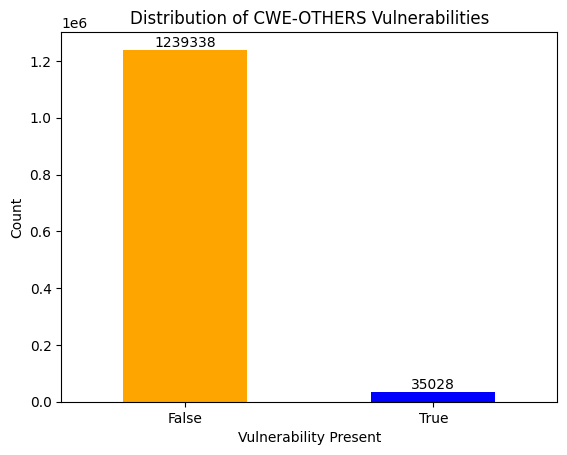

In [17]:
# Plot the distribution of CWE-OTHERS vulnerabilities
counts = cwe_others_df['CWE-OTHERS'].value_counts()
ax = counts.plot(kind='bar', color=['orange', 'blue'])
plt.xticks(rotation=0)
plt.title('Distribution of CWE-OTHERS Vulnerabilities')
plt.xlabel('Vulnerability Present')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
print(counts)
plt.show()

### Balancing the data for each CWE using random undersampling technique

In [18]:
# Randomly undersampling

def under_sampling(dataframe, vulnType, samples=None):
    shuffled_df = dataframe.sample(frac=1, random_state=4)

    # Separate vulnerable and non-vulnerable samples
    vul_df = shuffled_df[shuffled_df[vulnType] == True]
    
    # Set samples to match vulnerable count if not provided
    if samples is None:
        samples = len(vul_df)

    # Randomly undersample the majority class
    non_vul_df = shuffled_df[shuffled_df[vulnType] == 0].sample(n=samples, random_state=42)

    # Concatenate the two dataframes
    balanced_df = pd.concat([vul_df, non_vul_df]).sample(frac=1, random_state=4).reset_index(drop=True)

    return balanced_df

In [19]:
# ClusterCentroids undersampling

"""

def undersample_cluster(dataframe, vulnType):
    X = dataframe.drop(columns=[vulnType])  # Features
    y = dataframe[vulnType]  # Labels
    
    # Apply ClusterCentroids
    undersampler = ClusterCentroids(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    # Recreate DataFrame
    balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
    balanced_df[vulnType] = y_resampled

    return balanced_df

"""

"\n\ndef undersample_cluster(dataframe, vulnType):\n    X = dataframe.drop(columns=[vulnType])  # Features\n    y = dataframe[vulnType]  # Labels\n    \n    # Apply ClusterCentroids\n    undersampler = ClusterCentroids(sampling_strategy='auto', random_state=42)\n    X_resampled, y_resampled = undersampler.fit_resample(X, y)\n    \n    # Recreate DataFrame\n    balanced_df = pd.DataFrame(X_resampled, columns=X.columns)\n    balanced_df[vulnType] = y_resampled\n\n    return balanced_df\n\n"

In [20]:
# Apply undersampling to the datasets
normalize_CWE_119 = under_sampling(cwe_119_df, 'CWE-119')
nomarlize_CWE_120 = under_sampling(cwe_120_df, 'CWE-120')
normalize_CWE_469 = under_sampling(cwe_469_df, 'CWE-469')
normalize_CWE_476 = under_sampling(cwe_476_df, 'CWE-476')
normalize_CWE_others = under_sampling(cwe_others_df, 'CWE-OTHERS')

In [21]:
# Reset the index
normalize_CWE_119.reset_index(inplace=True)
nomarlize_CWE_120.reset_index(inplace=True)
normalize_CWE_469.reset_index(inplace=True)
normalize_CWE_476.reset_index(inplace=True)
normalize_CWE_others.reset_index(inplace=True)

In [22]:
# Add type column to the datasets
normalize_CWE_119['type'] = 'CWE-119'
nomarlize_CWE_120['type'] = 'CWE-120'
normalize_CWE_469['type'] = 'CWE-469'
normalize_CWE_476['type'] = 'CWE-476'
normalize_CWE_others['type'] = 'CWE-OTHERS'

In [23]:
# Rename the columns
normalize_CWE_119.columns = ['testID', 'code', 'vuln', 'type']
nomarlize_CWE_120.columns = ['testID', 'code', 'vuln', 'type']
normalize_CWE_469.columns = ['testID', 'code', 'vuln', 'type']
normalize_CWE_476.columns = ['testID', 'code', 'vuln', 'type']
normalize_CWE_others.columns = ['testID', 'code', 'vuln', 'type']

In [24]:
normalize_CWE_119['testID'] = normalize_CWE_119.index
nomarlize_CWE_120['testID'] = nomarlize_CWE_120.index
normalize_CWE_469['testID'] = normalize_CWE_469.index
normalize_CWE_476['testID'] = normalize_CWE_476.index
normalize_CWE_others['testID'] = normalize_CWE_others.index

In [25]:
normalize_CWE_119.head()

,testID,code,vuln,type
0,0,"b'trace_readlink_cbk (call_frame_t *frame, voi...",True,CWE-119
1,1,b'inet6name(const unsigned char *in6)\n{\n\tch...,True,CWE-119
2,2,b'rootfs_mount(struct file_system_type *fs_typ...,False,CWE-119
3,3,"b'locate_srv_conf_1(krb5_context context, cons...",True,CWE-119
4,4,"b'ohci_start_iso(struct fw_iso_context *base,\...",False,CWE-119


Adding a "filename" column to each dataframe, which should be a string or object needed as input for the Clang parser used later in "AST_extracting.ipynb"

In [26]:
# Add filename column to each normalized dataframe
def add_filename_column(df, prefix):
    # insert filename column after testID
    df.insert(1, 'filename', prefix + '_' + df['testID'].astype(str) + '.c')
    return df

normalize_CWE_119 = add_filename_column(normalize_CWE_119, "cwe119")
nomarlize_CWE_120 = add_filename_column(nomarlize_CWE_120, "cwe120") 
normalize_CWE_469 = add_filename_column(normalize_CWE_469, "cwe469")
normalize_CWE_476 = add_filename_column(normalize_CWE_476, "cwe476")
normalize_CWE_others = add_filename_column(normalize_CWE_others, "cweother")

In [27]:
normalize_CWE_119.head()

,testID,filename,code,vuln,type
0,0,cwe119_0.c,"b'trace_readlink_cbk (call_frame_t *frame, voi...",True,CWE-119
1,1,cwe119_1.c,b'inet6name(const unsigned char *in6)\n{\n\tch...,True,CWE-119
2,2,cwe119_2.c,b'rootfs_mount(struct file_system_type *fs_typ...,False,CWE-119
3,3,cwe119_3.c,"b'locate_srv_conf_1(krb5_context context, cons...",True,CWE-119
4,4,cwe119_4.c,"b'ohci_start_iso(struct fw_iso_context *base,\...",False,CWE-119


In [28]:
# Saving the normalized dataframes to csv files
normalize_CWE_119.to_csv('Datasets/Normalized_CWE-119.csv.gz', compression='gzip')
nomarlize_CWE_120.to_csv('Datasets/Normalized_CWE-120.csv.gz', compression='gzip')
normalize_CWE_469.to_csv('Datasets/Normalized_CWE-469.csv.gz', compression='gzip')
normalize_CWE_476.to_csv('Datasets/Normalized_CWE-476.csv.gz', compression='gzip')
normalize_CWE_others.to_csv('Datasets/Normalized_CWE-OTHERS.csv.gz', compression='gzip')